In [44]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [45]:
#import data
df = pd.read_csv("dataset/grad/Admission_Predict.csv")

In [46]:
#cleanup
df.drop(["Serial No."],axis=1,inplace=True)
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [47]:
#check to make sure there's no missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

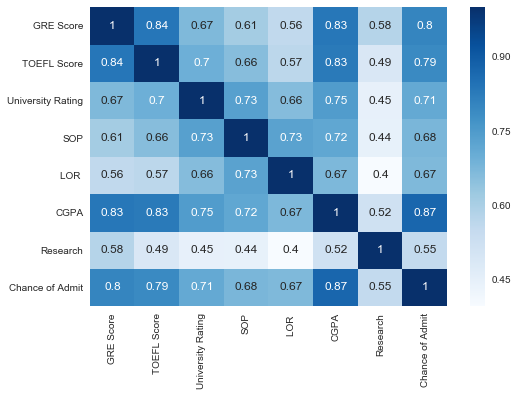

In [48]:
corr=df.corr()
sb.heatmap(corr,annot=True,cmap="Blues")
plt.show()

In [49]:
#Import Validation data
testdf = pd.read_csv('dataset/grad/Admission_Predict_Ver1.1.csv',skiprows=400) #skipping first 400 rows
test_org = testdf.copy() #reserve original test DataFrame
testdf.columns=['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
testdf.drop(testdf[['Serial No.','Chance of Admit']],axis=1,inplace=True) #drop Serial No., and Chance of Admit

In [50]:
#Preparing data for regression
x = df.iloc[:,:-1].values
y = df.iloc[:,7].values
testX = testdf.iloc[:,:].values
testY = test_org.iloc[:,8].values

In [51]:
#Linear Regression
scaler = sk.preprocessing.StandardScaler()
x = scaler.fit_transform(x)
testX = scaler.fit_transform(testX)
regressor = sk.linear_model.LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#Results
predict = regressor.predict(testX)
mse = sk.metrics.mean_squared_error(predict,testY)
mae = sk.metrics.mean_absolute_error(predict,testY)
print("mean_squared_error : %f\nmean_absolute_error : %f\nPercentage Correct: %f"%(mse,mae,regressor.score(x,y)))

mean_squared_error : 0.002002
mean_absolute_error : 0.034729
Percentage Correct: 0.803471
